## Using Pandas to plot prior years on current year axis

dataset source
https://data-nifc.opendata.arcgis.com/datasets/nifc::wfigs-wildland-fire-locations-full-history/about

In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

### Read in data

In [195]:
# read in data
df = pd.read_csv('WFIGS_-_Wildland_Fire_Locations_Full_History.csv', low_memory=False)

In [196]:
df.shape

(185496, 92)

In [197]:
df.head()

,X,Y,OBJECTID,ABCDMisc,ADSPermissionState,CalculatedAcres,ContainmentDateTime,ControlDateTime,DailyAcres,DiscoveryAcres,DispatchCenterID,FinalFireReportApprovedByTitle,FinalFireReportApprovedByUnit,FinalFireReportApprovedDate,FireBehaviorGeneral,FireBehaviorGeneral1,FireBehaviorGeneral2,FireBehaviorGeneral3,FireCause,FireCauseGeneral,FireCauseSpecific,FireCode,FireDepartmentID,FireDiscoveryDateTime,FireMgmtComplexity,FireOutDateTime,FireStrategyConfinePercent,FireStrategyFullSuppPercent,FireStrategyMonitorPercent,FireStrategyPointZonePercent,FSJobCode,FSOverrideCode,GACC,ICS209ReportDateTime,ICS209ReportForTimePeriodFrom,ICS209ReportForTimePeriodTo,ICS209ReportStatus,IncidentManagementOrganization,IncidentName,IncidentShortDescription,IncidentTypeCategory,IncidentTypeKind,InitialLatitude,InitialLongitude,InitialResponseAcres,InitialResponseDateTime,IrwinID,IsFireCauseInvestigated,IsFireCodeRequested,IsFSAssisted,IsMultiJurisdictional,IsReimbursable,IsTrespass,IsUnifiedCommand,LocalIncidentIdentifier,PercentContained,PercentPerimeterToBeContained,POOCity,POOCounty,POODispatchCenterID,POOFips,POOJurisdictionalAgency,POOJurisdictionalUnit,POOJurisdictionalUnitParentUnit,POOLandownerCategory,POOLandownerKind,POOLegalDescPrincipalMeridian,POOLegalDescQtr,POOLegalDescQtrQtr,POOLegalDescRange,POOLegalDescSection,POOLegalDescTownship,POOPredictiveServiceAreaID,POOProtectingAgency,POOProtectingUnit,POOState,PredominantFuelGroup,PredominantFuelModel,PrimaryFuelModel,SecondaryFuelModel,TotalIncidentPersonnel,UniqueFireIdentifier,WFDSSDecisionStatus,CreatedBySystem,ModifiedBySystem,IsDispatchComplete,OrganizationalAssessment,StrategicDecisionPublishDate,CreatedOnDateTime_dt,ModifiedOnDateTime_dt,Source,GlobalID
0,-104.457511,45.785037,1,NaN,CERTIFIED,50.64,2020/08/06 23:13:07+00,2020/08/06 23:13:25+00,50.6,20.0,MTMCC,NaN,NaN,2020/08/12 20:46:00+00,NaN,NaN,NaN,NaN,Human,Equipment,Farming Equipment,NDU0,NaN,2020/08/06 18:58:00+00,NaN,2020/08/12 14:00:00+00,NaN,NaN,NaN,NaN,PN,1502,NRCC,1970/01/01 00:00:00+00,1970/01/01 00:00:00+00,1970/01/01 00:00:00+00,NaN,NaN,Ramme,NaN,WF,FI,45.78496,-104.4958,NaN,1970/01/01 00:00:00+00,fe67856c-7401-44bd-b6f3-9a57ef990079,NaN,0,1.0,0.0,0.0,0.0,NaN,000224,NaN,NaN,NaN,Carter,MTMCC,30011,C&L,MTLG42,NaN,Private,Private,NaN,NaN,NaN,NaN,NaN,NaN,NR16,C&L,MTLG42,US-MT,Grass,GR4,NaN,NaN,NaN,2020-MTLG42-000224,No Decision,wildcad,INFORM_Inspector,0,NaN,1970/01/01 00:00:00+00,2020/08/06 19:50:29.023+00,2020/08/12 20:46:01.557+00,IRWIN,e5436898-ed0d-4cb1-90c0-d61915fe1f29
1,-118.180712,33.808985,2,NaN,DEFAULT,NaN,1970/01/01 00:00:00+00,1970/01/01 00:00:00+00,NaN,0.1,CALACC,NaN,NaN,1970/01/01 00:00:00+00,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,2020/02/28 20:45:40+00,NaN,1970/01/01 00:00:00+00,NaN,NaN,NaN,NaN,NaN,NaN,OSCC,1970/01/01 00:00:00+00,1970/01/01 00:00:00+00,1970/01/01 00:00:00+00,NaN,NaN,LAC-066100,NaN,WF,FI,33.80898,-118.1807,NaN,1970/01/01 00:00:00+00,6a311abb-df4f-4947-b8dd-3900bda784f6,NaN,0,NaN,NaN,NaN,NaN,NaN,066100,NaN,NaN,NaN,Los Angeles,CALACC,06037,NaN,CACAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SC08,C&L,CALAC,US-CA,NaN,NaN,NaN,NaN,NaN,2020-CALAC-066100,No Decision,lacocad,lacocad,0,NaN,1970/01/01 00:00:00+00,2020/02/28 20:52:36.363+00,2020/02/28 20:52:36.363+00,IRWIN,0e79b7fd-2882-43cf-8cfa-911bd1c8f77a
2,-114.835414,48.073946,3,NaN,DEFAULT,NaN,2017/10/18 00:30:00+00,2017/10/18 00:35:00+00,50.0,50.0,MTKIC,NaN,NaN,1970/01/01 00:00:00+00,NaN,NaN,NaN,NaN,Human,NaN,NaN,NaN,NaN,2017/10/17 20:20:24+00,NaN,2017/11/09 22:00:00+00,NaN,NaN,NaN,NaN,NaN,NaN,NRCC,1970/01/01 00:00:00+00,1970/01/01 00:00:00+00,1970/01/01 00:00:00+00,NaN,NaN,South Lost Prairie,NaN,WF,FI,48.07167,-114.8303,1.0,1970/01/01 00:00:00+00,9599ae8e-66b8-4412-b849-7271271b0463,NaN,0,0.0,0.0,0.0,0.0,NaN,000878,NaN,NaN,NaN,Flathead,NaN,30029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NR02,DNRC,MTNWS,US-MT,NaN,NaN,NaN,NaN,NaN,2017-MTNWS-000878,NaN,wildcad,wildcad,0,NaN,1970/01/01 00:00:00+00,2017/10/18 13:46:40.483+00,2017/11/09 22:08:19.617+0

In [198]:
# the vast majority of fires are wildfires
df.IncidentTypeCategory.value_counts()

WF    174725
RX     10673
CX        98
Name: IncidentTypeCategory, dtype: int64

### Clean/prepare data

In [199]:
# identify date columns
[x for x in df.columns if 'Date' in x]

['ContainmentDateTime',
 'ControlDateTime',
 'FinalFireReportApprovedDate',
 'FireDiscoveryDateTime',
 'FireOutDateTime',
 'ICS209ReportDateTime',
 'InitialResponseDateTime',
 'StrategicDecisionPublishDate',
 'CreatedOnDateTime_dt',
 'ModifiedOnDateTime_dt']

In [200]:
# none of these are in datetime format
df[[x for x in df.columns if 'Date' in x]].dtypes

ContainmentDateTime             object
ControlDateTime                 object
FinalFireReportApprovedDate     object
FireDiscoveryDateTime           object
FireOutDateTime                 object
ICS209ReportDateTime            object
InitialResponseDateTime         object
StrategicDecisionPublishDate    object
CreatedOnDateTime_dt            object
ModifiedOnDateTime_dt           object
dtype: object

In [201]:
# since I want to do some analysis about the number of firefires in each year
# I will format FireDiscoveryDateTime column to datetime format
df['FireDiscoveryDateTime'] = pd.to_datetime(df['FireDiscoveryDateTime'])

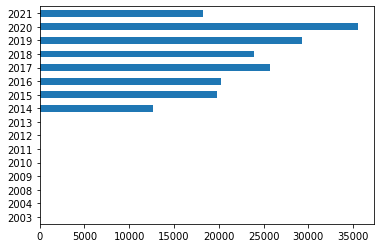

In [202]:
# what is the distribution of fires by year?
df.FireDiscoveryDateTime.dt.year.value_counts().sort_index().plot(kind='barh');

In [203]:
# exclude fires extinguished prior to 2014 since there is very little data for these years
df = df[df.FireDiscoveryDateTime.dt.year > 2013]

In [228]:
df.groupby([df.FireDiscoveryDateTime.dt.month, df.FireDiscoveryDateTime.dt.year]).size() \
    .groupby(level=1).apply(lambda x: 100 * x / float(x.sum())).unstack()

FireDiscoveryDateTime,2014,2015,2016,2017,2018,2019,2020,2021
FireDiscoveryDateTime,,,,,,,,
1,0.007890,1.641746,1.496222,1.818111,3.722561,1.723784,2.601854,6.923415
2,0.047337,2.510608,5.209619,3.414311,2.762708,2.411246,3.708907,5.727452
3,0.071006,5.450596,7.105822,5.220743,6.188966,5.732266,5.383535,18.685539
4,0.497041,8.516872,8.661301,6.135638,9.894833,9.357685,7.198651,24.083827
5,5.222880,6.789250,8.063799,7.583898,10.366413,8.848074,10.177016,21.724819
6,13.072978,14.942413,14.038813,12.676166,11.397212,10.506875,12.540039,22.854948
7,38.682446,22.221661,20.433559,24.733318,24.505467,16.858198,17.662265,NaN
8,25.806706,19.817135,14.799269,16.059332,14.393623,16.249401,17.094690,NaN
9,7.668639,7.738937,8.034171,8.864751,7.895835,12.456392,8.850801,NaN


<Figure size 432x288 with 0 Axes>

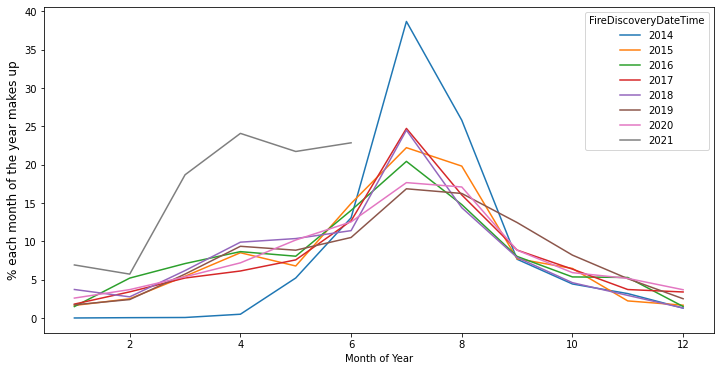

In [244]:
# examine distribution by month of year

plt.figure()

df.groupby([df.FireDiscoveryDateTime.dt.month, df.FireDiscoveryDateTime.dt.year]).size() \
    .groupby(level=1).apply(lambda x: 100 * x / float(x.sum())).unstack().plot(figsize=(12, 6))

plt.ylabel('% each month of the year makes up', fontsize=12)
plt.xlabel('Month of Year');

<Figure size 432x288 with 0 Axes>

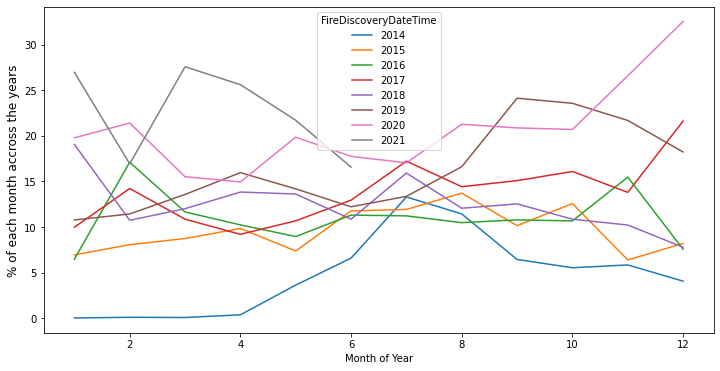

In [246]:
# take a look at the distribution by each month accross all years 

plt.figure()

df.groupby([df.FireDiscoveryDateTime.dt.month, df.FireDiscoveryDateTime.dt.year]).size() \
    .groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack().plot(figsize=(12, 6))

plt.ylabel('% of each month accross the years', fontsize=12)
plt.xlabel('Month of Year');

In [131]:
# since 2014 data doesn't look complete for the first half of the year I will exclude this year as well
df = df[df.FireDiscoveryDateTime.dt.year > 2014]

# Plot prior years against current year

In [132]:
#specify month that should be the separation between this year and next year
# assign as integer
break_month = 1

#### 1. set current year date range

In [133]:
current_year = datetime.datetime.today().year

In [134]:
# find current year date range
current_year_date_range = pd.date_range(pd.to_datetime(f'{current_year}'), pd.to_datetime(f'{current_year}-12-31'))

In [135]:
current_year_date_range

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

#### 2. aggregate data

In [184]:
df_agg = df.groupby([df.FireDiscoveryDateTime.dt.dayofyear, df.FireDiscoveryDateTime.dt.year])['CalculatedAcres'].size().round(0) \
    .rename_axis(['Date','Year']).unstack().fillna(0)

#### 3. map prior years onto current year

In [185]:
 # if non leap year adjust days to match current year by consolidating count from day 366 to day 365
if len(current_year_date_range) != len(df_agg.index):

    df_agg.loc[len(current_year_date_range)] = df_agg.loc[df_agg.index.max()]

    # drop day 366
    df_agg.drop(df_agg[len(current_year_date_range) < df_agg.index].index, inplace=True)

In [186]:
# examining the end of the year, the data looks as expected
df_agg.tail()

Year,2015,2016,2017,2018,2019,2020,2021
Date,,,,,,,
361,1.0,4.0,12.0,4.0,6.0,44.0,0.0
362,4.0,3.0,17.0,6.0,5.0,44.0,0.0
363,0.0,5.0,16.0,6.0,8.0,32.0,0.0
364,2.0,25.0,18.0,5.0,14.0,21.0,0.0
365,0.0,11.0,0.0,0.0,0.0,15.0,0.0


#### 3.1 Method 1 - compute cumulative sum amounts 


In [187]:
# compute cumulative sum amounts 
df_agg = pd.concat([
    df_agg[df_agg.columns[df_agg.columns != datetime.datetime.today().year]].cumsum(),
    df_agg.loc[pd.to_datetime(datetime.datetime.today().date()).dayofyear > df_agg.index , df_agg.columns[df_agg.columns == datetime.datetime.today().year]].cumsum()
], axis=1)

In [188]:
df_agg.index = current_year_date_range

In [191]:
df_agg.tail().style.highlight_null(null_color='yellow')

Year,2015,2016,2017,2018,2019,2020,2021
2021-12-27 00:00:00,19788.000000,20170.000000,25619.000000,23938.000000,29196.000000,35461.000000,nan
2021-12-28 00:00:00,19792.000000,20173.000000,25636.000000,23944.000000,29201.000000,35505.000000,nan
2021-12-29 00:00:00,19792.000000,20178.000000,25652.000000,23950.000000,29209.000000,35537.000000,nan
2021-12-30 00:00:00,19794.000000,20203.000000,25670.000000,23955.000000,29223.000000,35558.000000,nan
2021-12-31 00:00:00,19794.000000,20214.000000,25670.000000,23955.000000,29223.000000,35573.000000,nan


#### 3.2 Method 2 - compute cumulative sum amounts 


In [111]:
# assign index to be the date range of the current year
df_agg.sort_index(inplace=True)

df_agg = df_agg.cumsum()

df_agg.index = current_year_date_range

In [112]:
# verify that index is sorted coresponding to the adj_day_sequence we created above
df_agg.sort_index()

Year,2015,2016,2017,2018,2019,2020,2021
2021-01-01,1.0,4.0,11.0,52.0,26.0,31.0,41.0
2021-01-02,1.0,5.0,19.0,96.0,54.0,63.0,57.0
2021-01-03,3.0,7.0,26.0,130.0,68.0,82.0,82.0
2021-01-04,8.0,14.0,36.0,161.0,80.0,99.0,129.0
2021-01-05,16.0,17.0,48.0,193.0,88.0,124.0,166.0
...,...,...,...,...,...,...,...
2021-12-27,19788.0,20170.0,25619.0,23938.0,29196.0,35461.0,18228.0
2021-12-28,19792.0,20173.0,25636.0,23944.0,29201.0,35505.0,18228.0
2021-12-29,19792.0,20178.0,25652.0,23950.0,29209.0,35537.0,18228.0
2021-12-30,19794.0,20203.0,25670.0,23955.0,29223.0,35558.0,18228.0


In [113]:
# for the current year 
# for days beyond the latest date remove cumsum() values

df_agg.loc[df_agg.loc[str(str(datetime.datetime.today().date())) < df_agg.index].index, current_year] = None

In [114]:
df_agg.tail().style.highlight_null(null_color='yellow')

Year,2015,2016,2017,2018,2019,2020,2021
2021-12-27 00:00:00,19788.000000,20170.000000,25619.000000,23938.000000,29196.000000,35461.000000,nan
2021-12-28 00:00:00,19792.000000,20173.000000,25636.000000,23944.000000,29201.000000,35505.000000,nan
2021-12-29 00:00:00,19792.000000,20178.000000,25652.000000,23950.000000,29209.000000,35537.000000,nan
2021-12-30 00:00:00,19794.000000,20203.000000,25670.000000,23955.000000,29223.000000,35558.000000,nan
2021-12-31 00:00:00,19794.000000,20214.000000,25670.000000,23955.000000,29223.000000,35573.000000,nan


#### 4. plot

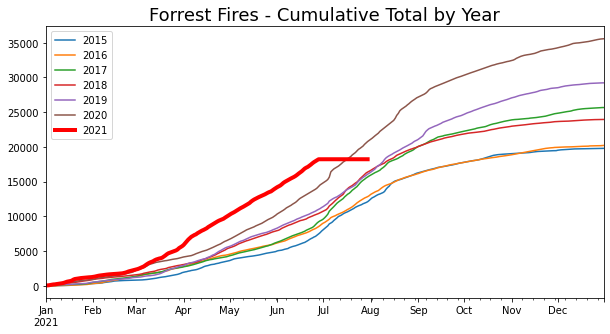

In [193]:
# fig, ax = plt.figure()
fig, ax = plt.subplots(figsize=(10, 5))

# plot prior years
df_agg.loc[:,df_agg.columns < current_year].plot(title='Forrest Fires', ax=ax)

# highlight current year by 
# plotting in red with extra thickness
df_agg.loc[:,df_agg.columns == current_year].plot(linewidth=4, color='red', ax=ax)

plt.legend(list(df_agg.columns[df_agg.columns <= current_year]))

plt.title('Forrest Fires - Cumulative Total by Year', fontsize=18);

# END

# Plot prior years against current year in sequence not following standard calendar cycle

But perhaps we have a cycle that does't fit the normal calendar cycle.  Tax filing is a good example here.  April of the year following the year being taxed is the year demarcation point.  So if I wanted to measure the all tax returns filed, comparing the current year against prior years I would want to calendar year that runs roughly May - April.  Recently, as part of my job, I was working to track metrics around just such a non-calendar year cycle.  This motivated me to explore different ways of expressing data that doesn't track well with January - December.

In [1003]:
#specify month that should be the separation between this year and next year
# assign as integer
break_month = 10

#### 1. shift dates forward/backward based on break point month

In [1004]:
df_adj = df.copy()

In [1005]:
df_adj['FireOutDateTime'] = df_adj['FireOutDateTime'].mask(df_adj['FireOutDateTime'].dt.month >= break_month, df_adj['FireOutDateTime'] + pd.DateOffset(years=1))

In [1006]:
# now that we have re-assigned data to different year
# examine resulting months with no data
df_adj.groupby([df_adj.FireOutDateTime.dt.year, df_adj.FireOutDateTime.dt.month]).size().unstack().isna().style.applymap(lambda x: 'background-color: yellow' if x == True else '')

FireOutDateTime,1,2,3,4,5,6,7,8,9,10,11,12
FireOutDateTime,,,,,,,,,,,,
2015,False,False,False,False,False,False,False,False,False,True,True,True
2016,False,False,False,False,False,False,False,False,False,False,False,False
2017,False,False,False,False,False,False,False,False,False,False,False,False
2018,False,False,False,False,False,False,False,False,False,False,False,False
2019,False,False,False,False,False,False,False,False,False,False,False,False
2020,False,False,False,False,False,False,False,False,False,False,False,False
2021,False,False,False,False,False,False,True,True,True,False,False,False


#### 2. set current year date range

In [1007]:
current_year = datetime.datetime.today().year

In [1008]:
# find current year date range
current_year_date_range = pd.date_range(pd.to_datetime(f'{current_year - 1}-{break_month}'), 
                                       pd.to_datetime(f'{current_year}-{break_month}') - pd.DateOffset(days=1))

In [1009]:
current_year_date_range

DatetimeIndex(['2020-10-01', '2020-10-02', '2020-10-03', '2020-10-04',
               '2020-10-05', '2020-10-06', '2020-10-07', '2020-10-08',
               '2020-10-09', '2020-10-10',
               ...
               '2021-09-21', '2021-09-22', '2021-09-23', '2021-09-24',
               '2021-09-25', '2021-09-26', '2021-09-27', '2021-09-28',
               '2021-09-29', '2021-09-30'],
              dtype='datetime64[ns]', length=365, freq='D')

#### 3. set date sequence

In [1010]:
# create two lists and
# add them together
# to create sequencing we want
adj_day_sequence = [x for x in range(pd.to_datetime(f'{current_year}-{break_month}').dayofyear, pd.to_datetime(f'{current_year}-12-31').dayofyear + 1)] + \
[x for x in range(1, (pd.to_datetime(f'{current_year}-{break_month}') - pd.DateOffset(1)).dayofyear + 1)]

In [1011]:
str(adj_day_sequence)

'[274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 1

#### 4. aggregate data

In [1012]:
df_agg = df.groupby([df.FireOutDateTime.dt.dayofyear, df.FireOutDateTime.dt.year])['CalculatedAcres'].size().round(0) \
    .rename_axis(['Date','Year']).unstack().fillna(0)

#### 5. map prior years onto current year

In [1013]:
# adjust days to match current year
# by consolidating count from day 366 to day 365
df_agg.loc[len(current_year_date_range)] = df_agg.loc[df_agg.index.max()]

# drop day 366
df_agg.drop(df_agg[len(current_year_date_range) < df_agg.index].index, inplace=True)

In [1014]:
# assign index to be adjusted index sequencing
df_agg.index = pd.Categorical(df_agg.index, categories=adj_day_sequence, ordered=True)

In [1015]:
# assign index to be the date range of the current year
df_agg.sort_index(inplace=True)

df_agg = df_agg.cumsum()

df_agg.index = current_year_date_range

In [1016]:
# verify that index is sorted coresponding to the adj_day_sequence we created above
df_agg.sort_index()

Year,2015,2016,2017,2018,2019,2020,2021
2020-10-01,25.0,57.0,35.0,61.0,58.0,61.0,0.0
2020-10-02,62.0,79.0,109.0,119.0,85.0,151.0,0.0
2020-10-03,80.0,96.0,144.0,150.0,136.0,202.0,0.0
2020-10-04,100.0,150.0,191.0,185.0,203.0,234.0,0.0
2020-10-05,153.0,180.0,218.0,210.0,227.0,273.0,0.0
...,...,...,...,...,...,...,...
2021-09-26,12920.0,13453.0,16129.0,15093.0,14683.0,20844.0,8949.0
2021-09-27,12951.0,13504.0,16163.0,15125.0,14715.0,20892.0,8949.0
2021-09-28,13015.0,13552.0,16196.0,15177.0,14734.0,20924.0,8949.0
2021-09-29,13083.0,13600.0,16231.0,15217.0,14758.0,20993.0,8949.0


In [1017]:
# for the current year
# for days beyond the latest date
# remove cumsum() values
df_agg.loc[df_agg.loc[str(str(datetime.datetime.today().date())) < df_agg.index].index, current_year] = None

In [1018]:
df_agg.tail().style.highlight_null(null_color='yellow')

Year,2015,2016,2017,2018,2019,2020,2021
2021-09-26 00:00:00,12920.000000,13453.000000,16129.000000,15093.000000,14683.000000,20844.000000,nan
2021-09-27 00:00:00,12951.000000,13504.000000,16163.000000,15125.000000,14715.000000,20892.000000,nan
2021-09-28 00:00:00,13015.000000,13552.000000,16196.000000,15177.000000,14734.000000,20924.000000,nan
2021-09-29 00:00:00,13083.000000,13600.000000,16231.000000,15217.000000,14758.000000,20993.000000,nan
2021-09-30 00:00:00,13112.000000,13638.000000,16273.000000,15256.000000,14858.000000,21066.000000,nan


#### 6. plot

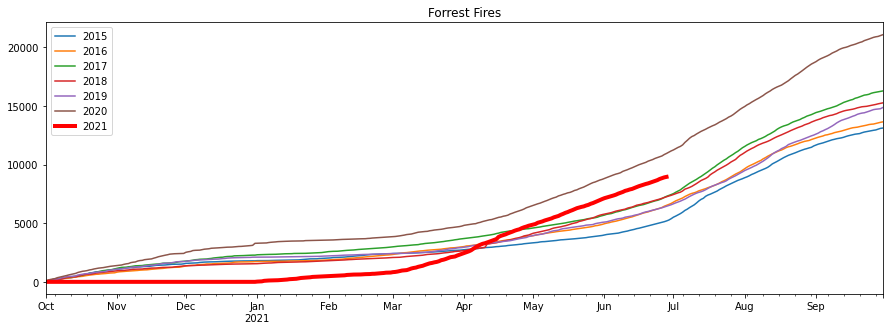

In [1019]:
# fig, ax = plt.figure()
fig, ax = plt.subplots(figsize=(15, 5))

# plot prior years
df_agg.loc[:,df_agg.columns < current_year].plot(title='Forrest Fires', ax=ax)

# highlight current year by 
# plotting in red with extra thickness
df_agg.loc[:,df_agg.columns == current_year].plot(linewidth=4, color='red', ax=ax)

plt.legend(list(df_agg.columns[df_agg.columns <= current_year]));

Data expressed in non-calandar year format. 

### Spare Parts

In [67]:
per = pd.Period('2018', freq='Q-MAR')
per.start_time

Timestamp('2018-01-01 00:00:00')

In [68]:
per.end_time

Timestamp('2018-03-31 23:59:59.999999999')

In [63]:
pd.concat([df.FireOutDateTime.dt.to_period('Q-mar').rename('year').dt.qyear,
           df.FireOutDateTime.dt.to_period('Q-mar').rename('quarter'),
           df.FireOutDateTime.dt.date,
           df.FireOutDateTime.dt.to_period('Q-mar').dt.dayofyear.rename('dayofyear')], axis=1).sample(20).sort_values(by='FireOutDateTime')

# .value_counts().sort_index()

C:\Users\mrkjh\Miniconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1102: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


,year,quarter,FireOutDateTime,dayofyear
151758,2016,2016Q1,2015-06-09,181
122533,2016,2016Q2,2015-08-14,273
15684,2017,2017Q2,2016-07-06,274
136493,2017,2017Q3,2016-12-16,366
144880,2017,2017Q4,2017-02-24,90
68419,2017,2017Q4,2017-03-27,90
95133,2018,2018Q1,2017-06-13,181
146080,2018,2018Q2,2017-07-01,273
101934,2018,2018Q3,2017-11-18,365
24132,2019,2019Q2,2018-07-19,273


In [71]:
df['shifted'] = df.FireOutDateTime.dt.to_period('Q-mar')

C:\Users\mrkjh\Miniconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1102: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


In [102]:
df.shifted

0         2021Q2
2         2018Q3
5         2021Q3
6         2020Q3
7         2021Q2
           ...  
185434    2022Q1
185439    2022Q1
185456    2022Q1
185473    2022Q1
185494    2022Q1
Name: shifted, Length: 103417, dtype: period[Q-MAR]

In [124]:
pd.concat([df.FireOutDateTime.dt.dayofyear.value_counts().sort_index(),
           (pd.to_datetime(df.shifted.dt.qyear.astype(str) + df.FireOutDateTime.dt.date.apply(lambda x: str(x)[4:])).dt.dayofyear).value_counts().sort_index().rename('r')], axis=1) \
.query("FireOutDateTime != r")


,FireOutDateTime,r
91,251,281
92,234,206
93,224,232
94,269,248
95,284,291
...,...,...
361,43,41
362,29,43
364,59,64
365,206,255


In [116]:
(pd.to_datetime(df.shifted.dt.qyear.astype(str) + df.FireOutDateTime.dt.date.apply(lambda x: str(x)[4:])).dt.dayofyear).value_counts().sort_index()


1       93
2       42
3       50
4       66
5       50
      ... 
362     43
363     46
364     64
365    255
366    110
Length: 366, dtype: int64

In [103]:
df.FireOutDateTime

0        2020-08-12 14:00:00+00:00
2        2017-11-09 22:00:00+00:00
5        2020-11-30 14:30:00+00:00
6        2019-11-13 00:15:00+00:00
7        2020-08-27 20:53:00+00:00
                    ...           
185434   2021-06-28 19:30:00+00:00
185439   2021-06-28 20:55:00+00:00
185456   2021-06-30 18:00:00+00:00
185473   2021-06-28 02:00:00+00:00
185494   2021-06-28 15:10:00+00:00
Name: FireOutDateTime, Length: 103417, dtype: datetime64[ns, UTC]

In [70]:
pd.concat([df.FireOutDateTime.dt.to_period('Q-dec').rename('year').dt.qyear,
           df.FireOutDateTime.dt.to_period('Q-dec').rename('quarter'),
           df.FireOutDateTime.dt.date,
           df.FireOutDateTime.dt.to_period('Q-dec').dt.dayofyear.rename('dayofyear')], axis=1).sample(20).sort_values(by='FireOutDateTime')

# .value_counts().sort_index()

C:\Users\mrkjh\Miniconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1102: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


,year,quarter,FireOutDateTime,dayofyear
155680,2015,2015Q2,2015-06-02,181
115728,2016,2016Q2,2016-04-15,182
14770,2016,2016Q2,2016-05-16,182
23145,2016,2016Q3,2016-08-10,274
67405,2017,2017Q2,2017-04-13,181
69036,2017,2017Q2,2017-06-06,181
105358,2017,2017Q3,2017-09-21,273
733,2017,2017Q3,2017-09-24,273
126597,2017,2017Q4,2017-11-18,365
150360,2018,2018Q3,2018-07-02,273


In [30]:
pd.Period('2020Q1', 'Q-Jun')

Period('2020Q1', 'Q-JUN')

In [32]:
df.FireOutDateTime.dt.to_period('Q-Jan').value_counts().sort_index()

C:\Users\mrkjh\Miniconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1102: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


2015Q4     226
2016Q1    1294
2016Q2    5481
2016Q3    5372
2016Q4     901
2017Q1    2072
2017Q2    5710
2017Q3    4822
2017Q4    1212
2018Q1    2015
2018Q2    6867
2018Q3    5946
2018Q4    1457
2019Q1    2273
2019Q2    6829
2019Q3    5290
2019Q4     724
2020Q1    1702
2020Q2    5469
2020Q3    6539
2020Q4    1401
2021Q1    2972
2021Q2    8419
2021Q3    7497
2021Q4    2390
2022Q1    4362
2022Q2    4175
Freq: Q-JAN, Name: FireOutDateTime, dtype: int64